In [2]:
# Dependencies
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymongo
import json

# Data path
data_path="Resources/data.csv"

# Read csv file load into a dataframe
tumor_df = pd.read_csv(data_path, delimiter=",")
tumor_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
# Deleting column with no values
tumor_df.drop(columns=['Unnamed: 32'], inplace=True)
print(len(tumor_df))

569


array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

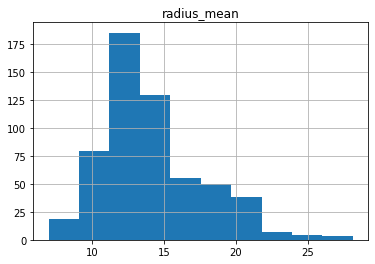

In [4]:
# Initial visualization to understand the data
tumor_df.hist("radius_mean")

In [5]:
# Calculating percentiles to divide the csv files into five csv files.
percent_list=list(np.percentile(tumor_df.radius_mean,[20,40,60,80,100]))
percent_list

[11.366, 12.726, 14.058000000000002, 17.067999999999998, 28.11]

In [6]:
# Create csv files based on the percentiles
df1=tumor_df.loc[tumor_df.radius_mean<percent_list[0]]
df1.to_csv(r"Resources\tumor1.csv", index=False)

df2=tumor_df.loc[(tumor_df.radius_mean>=percent_list[0]) & (tumor_df.radius_mean<percent_list[1])]
df2.to_csv(r"Resources\tumor2.csv", index=False)

df3=tumor_df.loc[(tumor_df.radius_mean>=percent_list[1]) & (tumor_df.radius_mean<percent_list[2])]
df3.to_csv(r"Resources\tumor3.csv", index=False)

df4=tumor_df.loc[(tumor_df.radius_mean>=percent_list[2]) & (tumor_df.radius_mean<percent_list[3])]
df4.to_csv(r"Resources\tumor4.csv",index=False)

df5=tumor_df.loc[tumor_df.radius_mean>=percent_list[3]]
df5.to_csv(r"Resources\tumor5.csv",index=False)

In [7]:
# Function to create json files
def createJson(csvName, jsonName):    
    
    # loading csv files to dataframe
    df1 = pd.read_csv(csvName, encoding = 'ISO-8859-1')

    # saving dataframe to json file
    df1.to_json(jsonName)
    
# Call function to create json files    
createJson("Resources/tumor1.csv", "Resources/tumor1.json")
createJson("Resources/tumor2.csv", "Resources/tumor2.json")
createJson("Resources/tumor3.csv", "Resources/tumor3.json")
createJson("Resources/tumor4.csv", "Resources/tumor4.json")
createJson("Resources/tumor5.csv", "Resources/tumor5.json")

In [10]:
# Connect to mongodb
myclient = MongoClient("mongodb://localhost:27017")

# create new database name: BreastCancer_DB
db = myclient["BreastCancer_DB"]

In [13]:
# Function to load json files into Mongo database
def createDB(jsonName, collName):
    
    # Create or Switch to collection name
    Col = db[collName]

    # Dropping collection if exists to avoid duplication
    Col.drop()

    # Loading or Opening the json file
    with open(jsonName, 'r') as file:
        file_data = json.load(file)

    # Inserting the loaded file to the Collection
    # if JSON contains data more than one entry
    # use 'insert_many' else use 'insert_one'
    if isinstance(file_data, list):
        Col.insert_many(file_data)  
    else:
        Col.insert_one(file_data)

# Function call to create collections in Mongo database
createDB("Resources/tumor1.json", "tumor1")
createDB("Resources/tumor2.json", "tumor2")
createDB("Resources/tumor3.json", "tumor3")
createDB("Resources/tumor4.json", "tumor4")
createDB("Resources/tumor5.json", "tumor5")

In [18]:
t2 = db.get_collection("tumor2")
t2.find_one()

{'_id': ObjectId('624c4b99071728230f81b54c'),
 'id': {'0': 84348301,
  '1': 843786,
  '2': 84501001,
  '3': 853612,
  '4': 857155,
  '5': 857343,
  '6': 857374,
  '7': 85759902,
  '8': 85922302,
  '9': 8610175,
  '10': 861103,
  '11': 8612080,
  '12': 861597,
  '13': 86211,
  '14': 862485,
  '15': 862965,
  '16': 863031,
  '17': 863270,
  '18': 86408,
  '19': 864685,
  '20': 865137,
  '21': 866714,
  '22': 868223,
  '23': 868682,
  '24': 869218,
  '25': 869476,
  '26': 869691,
  '27': 8711003,
  '28': 871122,
  '29': 8711561,
  '30': 8712064,
  '31': 87139402,
  '32': 873843,
  '33': 874373,
  '34': 874662,
  '35': 874839,
  '36': 875263,
  '37': 877501,
  '38': 87930,
  '39': 8810528,
  '40': 8811523,
  '41': 88147202,
  '42': 883539,
  '43': 884689,
  '44': 88518501,
  '45': 8911164,
  '46': 8912055,
  '47': 8912521,
  '48': 8912909,
  '49': 89143601,
  '50': 891703,
  '51': 891716,
  '52': 892189,
  '53': 892604,
  '54': 89296,
  '55': 893061,
  '56': 893783,
  '57': 893988,
  '58':